# Loading libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install graphviz
#conda install -c conda-forge python-graphviz

# Decision trees

### Loading a dataset for classification

In [5]:
X, y = load_breast_cancer(return_X_y=True)
print(X.shape)
print(y.shape)

##For this demonstration we will use iris data set from sklearn datasets.
##This dataset contain information about the petals and the sepals length and width of three species of flowers: iris, setosa and versicolor.

##The objective is to predict which species a flower belongs to.
#X, y = load_iris(return_X_y=True)
#print(X.shape)
#print(y.shape)
#np.unique(y)

(569, 30)
(569,)


,Error_metric,Train,Test
0,Accuracy,0.972362,0.941520
1,Precision,0.960938,0.931034
2,Recall,0.995951,0.981818


Confusion matrix for the train set
[[141   1]
 [ 10 246]]


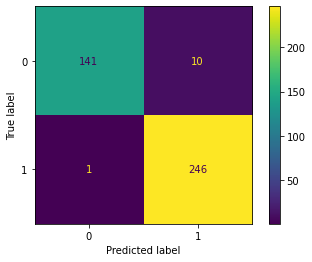



Confusion matrix for the test set
[[ 53   2]
 [  8 108]]


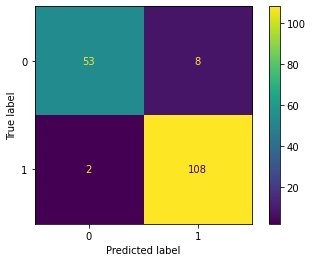

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

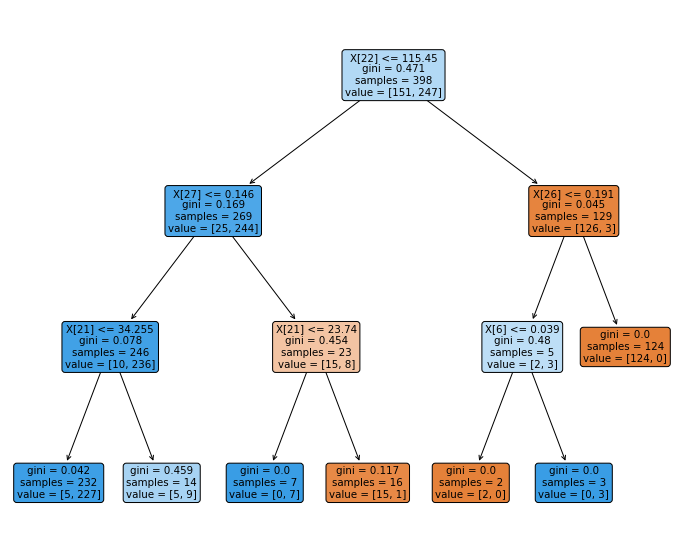

In [7]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,10))

plot_tree(dt,filled = True, rounded=True)
plt.show() 

### Loading a dataset for regression

Here we will use the Boston housing dataset which comes with sklearn. The objective is to predict the house prices.

In [8]:
X, y = load_boston(return_X_y=True)
print(X.shape)
print(y.shape)

(506, 13)
(506,)


## Data splitting

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

In [10]:
model = DecisionTreeRegressor(max_depth=3)

# Not needed because I'm using a decision tree
#trans = PowerTransform(), StandardScaler()
#trans.fit(X_train)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def performance_model(y_train, y_test, y_pred_train, y_pred_test):

    # Model validation y_train - y_pred_train
    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    MAE_test  = mean_absolute_error(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format


    df_train = pd.DataFrame({'Real_value': y_train, 'Predicted_value': y_pred_train})
    df_test  = pd.DataFrame({'Real_value': y_test,  'PRedicted_value': y_pred_test})

    return performance, df_train, df_test

In [12]:
performance, _ ,_ = performance_model(y_train, y_test, y_pred_train, y_pred_test)
performance

,Error_metric,Train,Test
0,Mean error,0.00,-0.54
1,Mean absolute error,2.91,3.43
2,Mean squared error,15.81,31.30
3,Root mean squared error,3.98,5.59
4,Mean absolute percentual error,15.37,18.91
5,R2,0.81,0.66


In [13]:
y_train.max()

50.0

In [14]:
y_train.min()

5.0

In [15]:
y_test.max()

50.0

In [16]:
y_test.min()

5.6

In [17]:
X_test.shape

(152, 13)

In [18]:
X_train.shape

(354, 13)

## Visualizing the decission tree

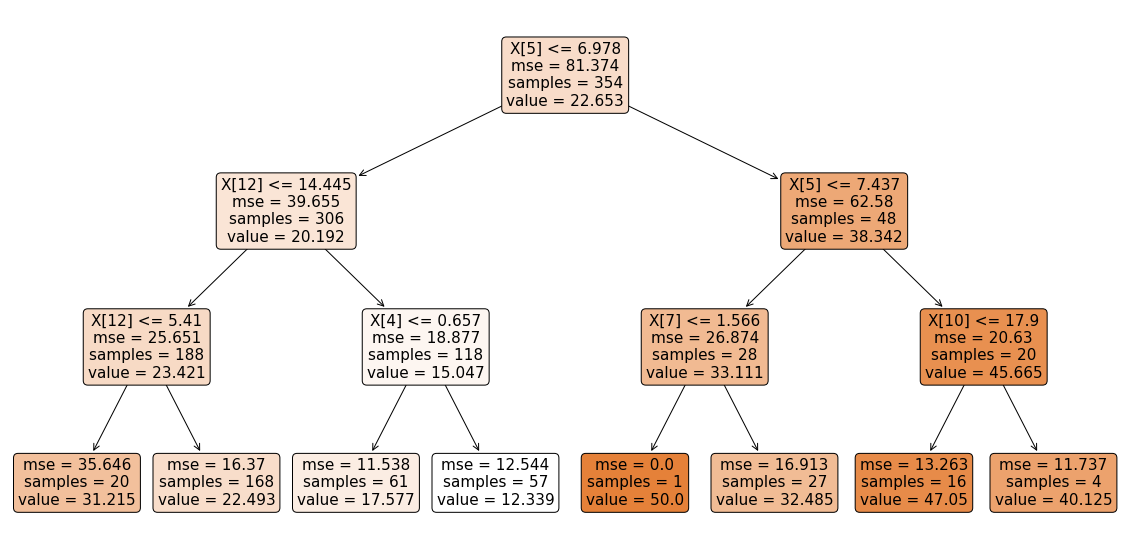

In [19]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))

plot_tree(model,filled = True, rounded=True)
plt.show()  